In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import Series
from statsmodels.tsa.stattools import adfuller
from math import sqrt
from pandas import DataFrame
from pandas import concat
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [43]:
dff = pd.read_csv("sovenir.csv",index_col=0, parse_dates=True, skipinitialspace=True)
dff.head()

,Sales
Mon_Year,
1987-01-01,1664.81
1987-02-01,2397.53
1987-03-01,2840.71
1987-04-01,3547.29
1987-05-01,3752.96


In [44]:
print("Shape:",dff.shape)

Shape: (84, 1)


In [45]:
dff.isnull().sum()

Sales    0
dtype: int64

In [46]:
dff.describe()

,Sales
count,84.000000
mean,14315.587143
std,15748.840332
min,1664.810000
25%,5884.435000
50%,8771.770000
75%,16888.917500
max,104660.670000


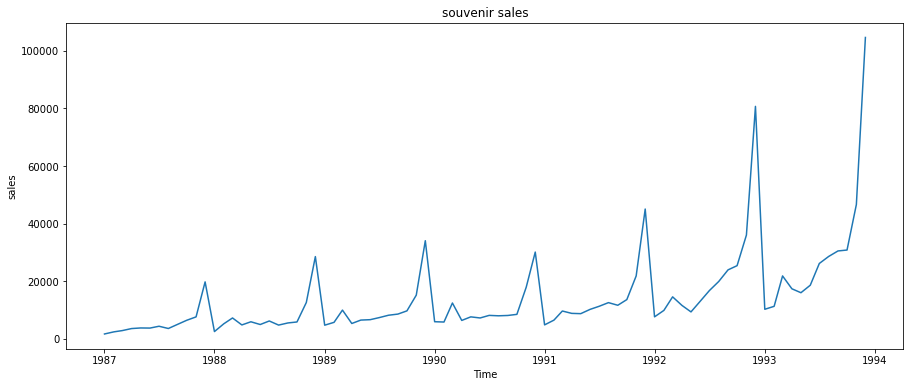

In [47]:
plt.figure(figsize=(15,6))
plt.plot(dff)
plt.title('souvenir sales')
plt.xlabel("Time")
plt.ylabel("sales")
plt.show()

Lets apply log to the data

In [48]:
from numpy import log
df = log(dff)

In [49]:
df.head()

,Sales
Mon_Year,
1987-01-01,7.417466
1987-02-01,7.782194
1987-03-01,7.951809
1987-04-01,8.173939
1987-05-01,8.230300


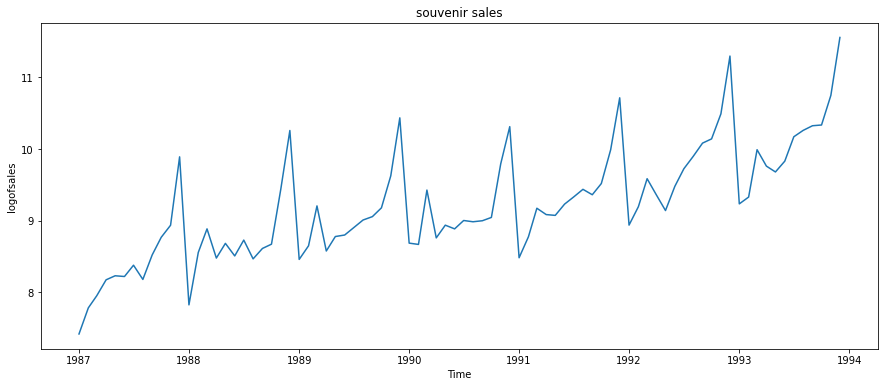

In [50]:
plt.figure(figsize=(15,6))
plt.plot(df)
plt.title('souvenir sales')
plt.xlabel("Time")
plt.ylabel("logofsales")
plt.show()

Adfuller Test

In [51]:
timeseries = adfuller(df)
print('ADF Statistic: %f' % timeseries[0])
print('p-value: %f' % timeseries[1])
print('Critical Values:')
for key, value in timeseries[4].items():
    print('\t%s: %.3f' % (key, value))
if timeseries[0] > timeseries[4]["5%"]:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")
else:
    print("Reject Ho - Time Series is Stationary")

ADF Statistic: 0.206646
p-value: 0.972632
Critical Values:
	1%: -3.526
	5%: -2.903
	10%: -2.589
Failed to Reject Ho - Time Series is Non-Stationary


In [52]:
X = df.values
X = np.sqrt(X)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] > result[4]["5%"]:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")
else:
    print("Reject Ho - Time Series is Stationary")

ADF Statistic: 0.023676
p-value: 0.960447
	1%: -3.526
	5%: -2.903
	10%: -2.589
Failed to Reject Ho - Time Series is Non-Stationary


In [53]:
data_stationery = df.diff().dropna()
result = adfuller(data_stationery)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] > result[4]["5%"]:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")
else:
    print("Reject Ho - Time Series is Stationary")

ADF Statistic: -2.962946
p-value: 0.038503
	1%: -3.527
	5%: -2.904
	10%: -2.589
Reject Ho - Time Series is Stationary


In [54]:
train=df[0:59] 
test=df[59:85]

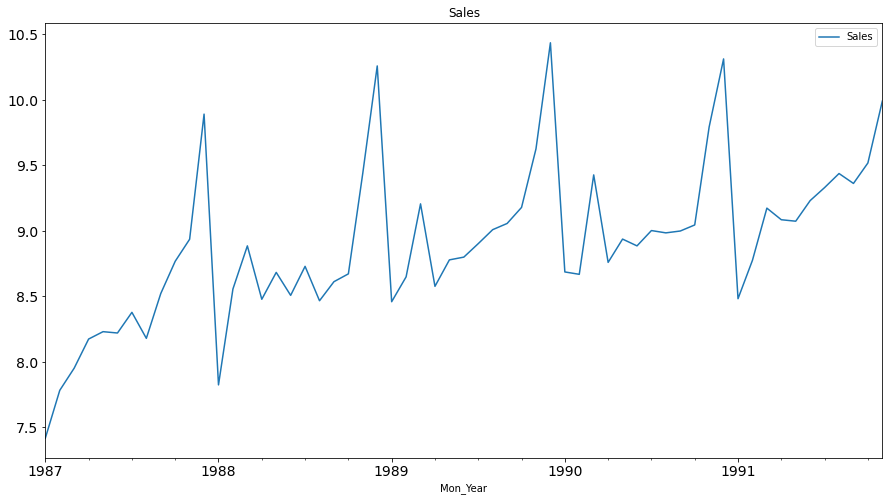

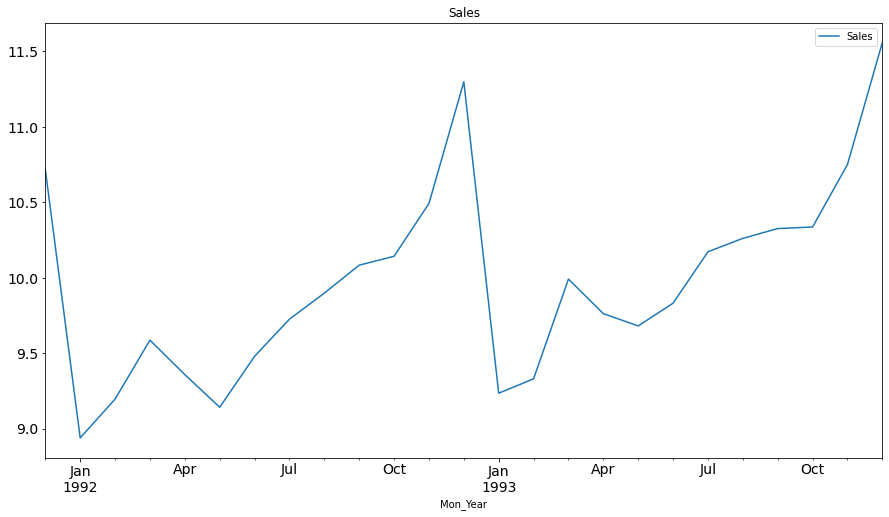

In [55]:
#Plotting data
train.plot(figsize=(15,8), title= 'Sales', fontsize=14)
test.plot(figsize=(15,8), title= 'Sales', fontsize=14)
plt.show()

Moving Average

In [56]:
width = 3
lag1 = df.shift(1)
lag3 = df.shift(width - 1)
window = lag3.rolling(window=width)
means = window.mean()
dataframe = concat([means, lag1, df], axis=1)
dataframe.columns = ['mean', 't-1', 't+1']
print(dataframe.head(10))

                mean       t-1       t+1
Mon_Year                                
1987-01-01       NaN       NaN  7.417466
1987-02-01       NaN  7.417466  7.782194
1987-03-01       NaN  7.782194  7.951809
1987-04-01       NaN  7.951809  8.173939
1987-05-01  7.717157  8.173939  8.230300
1987-06-01  7.969314  8.230300  8.220064
1987-07-01  8.118683  8.220064  8.377841
1987-08-01  8.208101  8.377841  8.179295
1987-09-01  8.276069  8.179295  8.521548
1987-10-01  8.259067  8.521548  8.767715


In [57]:
df = pd.DataFrame(df)

Test RMSE: 0.352


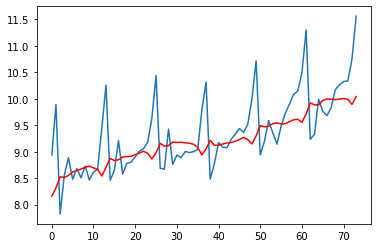

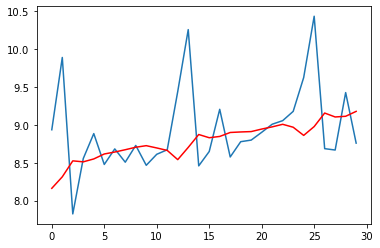

In [58]:
# prepare situation
X = df.Sales
window = 10
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)

error = mean_squared_error(test, predictions)
print('Test RMSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
# zoom plot
pyplot.plot(test[0:30])
pyplot.plot(predictions[0:30], color='red')
pyplot.show()

In [59]:
predictions, history

([8.162217282755156,
  8.314068901628932,
  8.524971784786176,
  8.512187855591943,
  8.550401473099479,
  8.615903648001225,
  8.641659917032479,
  8.672161447674778,
  8.704973286394436,
  8.72571163126537,
  8.695575343295511,
  8.66316250319892,
  8.541204856323747,
  8.702953699739508,
  8.873258376716288,
  8.830619440046565,
  8.8477250492909,
  8.90004830707636,
  8.906943312464186,
  8.911889414095885,
  8.94520224543087,
  8.974257227493803,
  9.00799597336746,
  8.969489412972885,
  8.861467327736188,
  8.978161800981155,
  9.156884386622359,
  9.10490320384831,
  9.11407922939511,
  9.178956412668905,
  9.174940202830232,
  9.178410094496211,
  9.166033471399702,
  9.160617754399228,
  9.141187594191605,
  9.078476086949063,
  8.939392876426474,
  9.05010258938859,
  9.214566113226104,
  9.120040299010991,
  9.12160512844953,
  9.145249726374827,
  9.165213914670687,
  9.172354974749748,
  9.197002202583425,
  9.230174046975787,
  9.26943167890008,
  9.226292060729019,
  9.

ARIMA

c:\users\jagad\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\jagad\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   83
Model:                 ARIMA(5, 1, 1)   Log Likelihood                 -64.134
Method:                       css-mle   S.D. of innovations              0.522
Date:                Tue, 19 Jan 2021   AIC                            144.267
Time:                        12:12:35   BIC                            163.618
Sample:                    02-01-1987   HQIC                           152.041
                         - 12-01-1993                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0401      0.025      1.582      0.114      -0.010       0.090
ar.L1.D.Sales    -1.1210      0.307     -3.648      0.000      -1.723      -0.519
ar.L2.D.Sales    -0.8652      0.227     

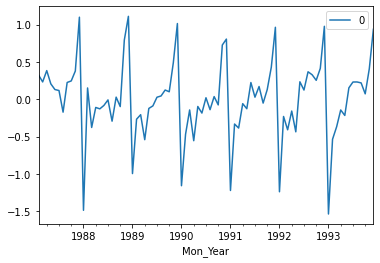

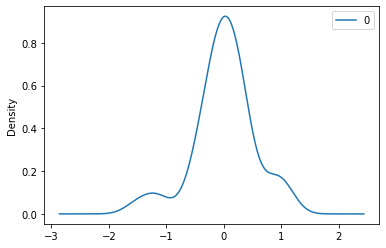

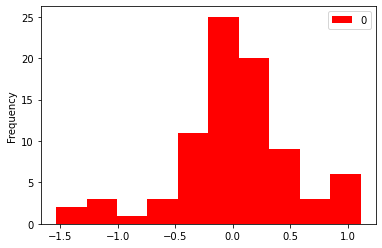

               0
count  83.000000
mean    0.005473
std     0.525539
min    -1.537458
25%    -0.195898
50%     0.027938
75%     0.233175
max     1.111009


In [60]:
x = df['Sales']
# fit model
model = ARIMA(x, order=(5,1,1))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

residuals.plot(kind = 'hist', color = 'red')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

<AxesSubplot:xlabel='Mon_Year'>

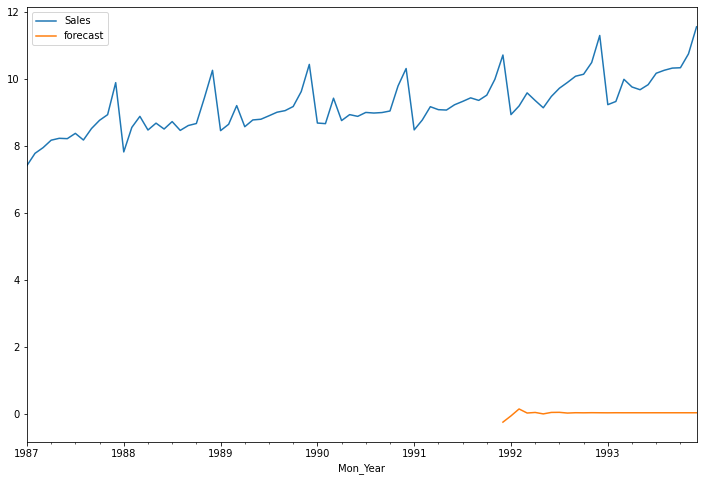

In [61]:
df['forecast']=model_fit.predict(start=59,end=85,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

c:\users\jagad\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\jagad\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Mon_Year'>

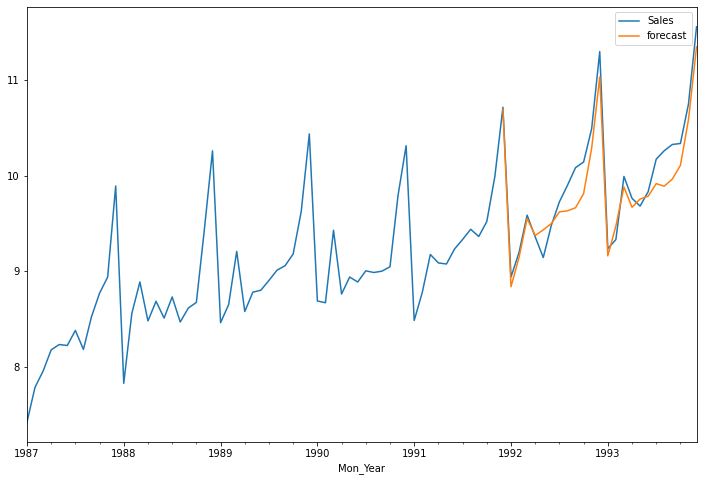

In [62]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df['forecast']=results.predict(start=59,end=85,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))


Holt winter method


In [63]:
train=df[0:59] 
test=df[59:85]

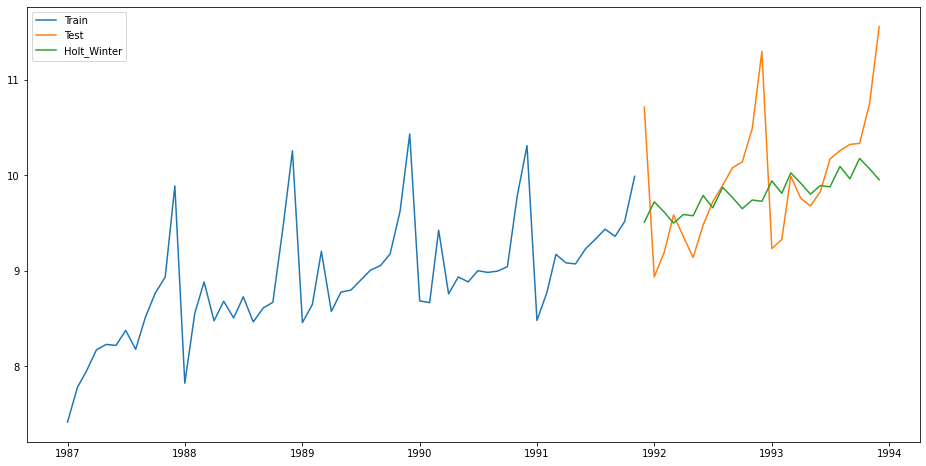

In [64]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [65]:
rms = sqrt(mean_squared_error(test.Sales, y_hat_avg.Holt_Winter))
print('RMSE:', rms)

RMSE: 0.6339060143690449


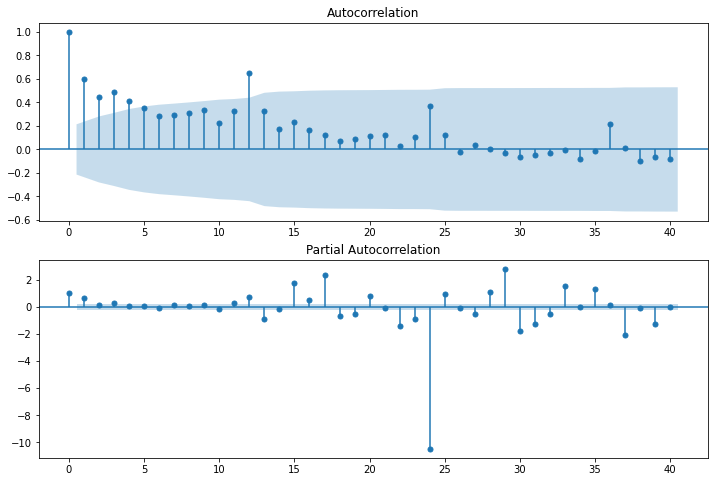

In [66]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Sales'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Sales'],lags=40,ax=ax2)

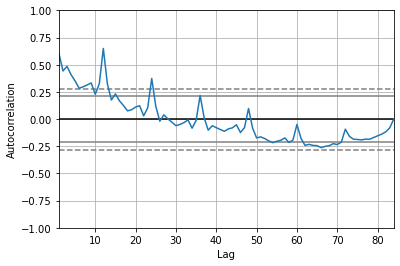

In [67]:
autocorrelation_plot(df['Sales'])
plt.show()

LJUNG BOX TEST


In [68]:
import statsmodels.api as sm

In [69]:
res = sm.tsa.ARMA(df['Sales'], (1,1)).fit(disp=-1)

c:\users\jagad\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [70]:
sm.stats.acorr_ljungbox(res.resid, lags=[5], return_df=True)

,lb_stat,lb_pvalue
5,4.558952,0.472035


In [71]:
sm.stats.acorr_ljungbox(res.resid, lags=[12], return_df=True)


,lb_stat,lb_pvalue
12,73.572533,6.833086e-11
